# Intro to ML

This assignment departs from the tradition of implementing everything from scratch and we will use a few libraries. First: `numpy`, the Python library for handling matrices.

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Next, `seaborn`, a library for easily plotting cute charts.

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Finally, `scikit-learn`, a library implementing many ML algorithm

In [ ]:
!pip install 'scikit-learn>=0.23.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Thorought the whole assignment you can - if you want - use the `numpy` library.

In [ ]:
import numpy as np

We begin by defining a simple dataset, mapping flat areas in `areas` to their rental prices (in Arbitrary Units of Currency, AUC for short) in `prices`. Both lists are of the same length, and are in the same order, i.e., the `i`-th flat has the area `areas[i]` and can be rented for `prices[i]` AUC

In [ ]:
areas = [77.0, 50.0, 44.0, 65.0, 65.0, 52.0, 48.0, 45.0, 45.0, 36.0, 53.0, 43.0, 53.0, 27.0, 100.0, 52.0, 84.0, 77.0, 42.0, 75.0, 47.0, 52.0, 64.0, 42.0, 85.0, 30.0]
prices = [282, 250, 262, 399, 285, 308, 336, 277, 275, 219, 332, 262, 334, 185, 370, 329, 179, 265, 237, 330, 265, 345, 307, 270, 355, 179]

## Task 1: prediction in 1D linear regression

Complete the following `predict` function so that, given a list of features and the weights in linear regression. Assume that `w1` represents the slope, whereas `w0` is the intercept. `x` is a single-dimensional vector (e.g., a `list` of `float`s) such that every value corresponds to the single feature of another example. `predict` should return a vector of the same length `y`, such that $y_i = w_1x_i + w_0$

You can use the `numpy` library if it is convenient for you, but it is by no means necessary.

In [ ]:
def predict(x, w1, w0):
    return np.array(x) * w1 + w0

Let's test it!

In [ ]:
feature = [1, 2, 3]
expected = [10, 20, 30]
predicted = predict(feature, 10, 0)

assert (np.array(predicted) == np.array(expected)).all()

In [ ]:
feature = [1, 2, 3]
expected = [11, 12, 13]
predicted = predict(np.array(feature), 1, 10)

assert (np.array(predicted) == np.array(expected)).all()

## Task 2: training a 1D linear regression model

Complete the following cell of code so it iteratively improves the weights of the model to find the best line mapping `x` to `y`. Use the gradient descent algorithm presented during the lecture. Again, `x` and `y` are vectors, such that `x[i]` is the feature of the `i`-th example, whereas `y[i]` is the decision attribute (i.e., the value to approximate with the line). `w1` and `w0` given as the parameters are the initial values for the parameters of the model (i.e., the line), whereas `max_iters` is the learning rate (denoted by $\eta$ in the slides). Finally, `learning_rate` is the number of steps (weight updates) to do. `train_linear_regression` should return a pair of values `(w1, w0)` representing the best line approximating `y` given `x` according to the mean squared error.

Implement it on your own instead of using an implementation available in a library (e.g., `sklearn.linear_model.SGDRegressor`). You can, however, use `numpy` if it is convenient for you.

In [ ]:
def train_linear_regression(x, y, w1=0.0, w0=0.0, learning_rate=0.001, max_iters=100000):
    for _ in range(max_iters):
        new_w1 = w1 - learning_rate / len(x) * sum((w1 * x[i] + w0 - y[i]) * x[i] for i in range(len(x)))
        new_w0 = w0 - learning_rate / len(x) * sum(w1 * x[i] + w0 - y[i] for i in range(len(x)))
        w1, w0 = new_w1, new_w0
    return (w1, w0)

Lets see how it works for a very simple case. The following cell should not fail.

In [ ]:
x = [1, 2, 3]
y = [16, 26, 36]
w1, w0 = train_linear_regression(x, y)
print(f"Model: y={w1}x+{w0}")
assert abs(w1 - 10) <= 0.01
assert abs(w0 - 6) <= 0.01

Model: y=10.000003552471926x+5.999991924396326


Let's train a model for the data on the rental prices (you may need to tweak `learning_rate` and/or `max_iters`):

In [ ]:
w1, w0 = train_linear_regression(areas, prices, learning_rate=0.0001, max_iters=100000)
print(f"Model: price = {w1} * area + {w0}")

Model: price = 2.820877963228235 * area + 120.98628676214642


And now let's see how the predictions and reality differ. Since comparing a bunch of numbers is inconvenient, we will plot a chart instead using the `seaborn` library. In the chart, the points represent the actual data, whereas the line is the output of the linear regression.

In [ ]:
predicted_prices = predict(areas, w1, w0)

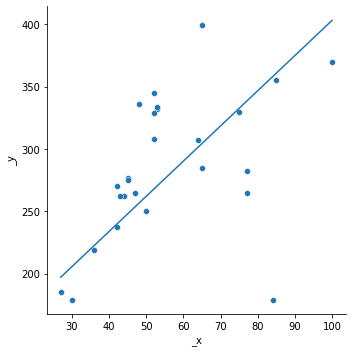

In [ ]:
import seaborn as sns
sns.relplot(x=areas, y=prices)
sns.lineplot(x=areas, y=predicted_prices)

## Task 3: mean-squared error

Comparing expected and predicted values on charts is not a very objective measure. Instead, it would be better to automate it. Complete the following function `mse` such that given two vectors `y_true` and `y_pred` of the same length, it returns the mean squared error, i.e., $$\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2$$ where $y$ stands for `y_true` and $\hat{y}$ for `y_pred`

In [ ]:
def mse(y_true, y_pred) -> float:
    return sum((true - pred) ** 2 for true, pred in zip(y_true, y_pred)) / len(y_true)

Let's make sure it works

In [ ]:
assert mse([1, 2, 3], [2, 5, 7]) == ((1-2)**2 + (2-5)**2 + (3-7)**2)/3

## Interlude: ridge regression in scikit-learn

We will now use a slightly larger dataset called *diabetes*. We begin by loading it using a loader provied in the `scikit-learn` library

In [ ]:
import sklearn.datasets
dataset = sklearn.datasets.load_diabetes()
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Threre are 442 examples described by 10 features each, organized into a matrix `dataset.data`:

In [ ]:
dataset.data.shape

(442, 10)

There is also a vector of values to predict:

In [ ]:
dataset.target.shape

(442,)

In [ ]:
print(f"The first example")
print("x[0]", dataset.data[0])
print("y[0]", dataset.target[0])

The first example
x[0] [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
y[0] 151.0


We need to split the dataset into three parts:
* a training set - to optimize the parameters of a model (e.g., the weights in the linear regression)
* a validation (development) set - to optimize the hyperparameters of a model (e.g., the coefficient $\alpha$ in the ridge regression)
* a test set - to see how well a model behaves on unseen data

In [ ]:
import sklearn.model_selection
X, test_X, y, test_y = sklearn.model_selection.train_test_split(dataset.data, dataset.target, random_state=42, test_size=.2)
train_X, val_X, train_y, val_y = sklearn.model_selection.train_test_split(X, y, random_state=43, test_size=.125)
print("Training set (70% of 442):", train_X.shape, train_y.shape)
print("Validation set (10% of 442):", val_X.shape, val_y.shape)
print("Test set (20% of 442):", test_X.shape, test_y.shape)

Training set (70% of 442): (308, 10) (308,)
Validation set (10% of 442): (45, 10) (45,)
Test set (20% of 442): (89, 10) (89,)


Let's train a ridge regression model, i.e, a linear regression model with a regularization component to avoid overfitting.

In [ ]:
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(train_X, train_y)

Ridge()

How well the model fares in terms of MSE on the training set?

In [ ]:
pred = regressor.predict(train_X)
mse(train_y, pred)

3459.873268888626

And on the validation set?

In [ ]:
pred = regressor.predict(val_X)
mse(val_y, pred)

3121.3173374229564

Now let's see what happens if we use a different value of the hyperparameter $\alpha$

In [ ]:
regressor = Ridge(alpha=10)
regressor.fit(train_X, train_y)
print("MSE on training:", mse(train_y, regressor.predict(train_X)))
print("MSE on validation:", mse(val_y, regressor.predict(val_X)))

MSE on training: 5304.002852383632
MSE on validation: 4051.260158699896


## Task 4: Hyperparameter optimization using the validation set

As you can see, the resulting values are very different. **Complete the function** below with some strategy to find the best value of the hyperparmeter `alpha` with respect to the mean-squared error `mse` on the validation set given as the parameters `val_X`, `val_y`. Use `train_X` and `train_y` as the training set. Return the best value of alpha. The strategy is up to you: you can use some set of fixed values, you can do something more elaborate. If you decide to use a fixed set of values, consider the cost function of the ridge regression and try to come up with a reasonable set of values (e.g., picking `[1, 1.1, 1.2]` is probably not that intersting)

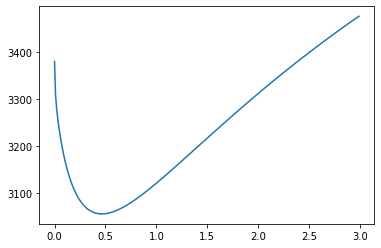

In [ ]:
domain = np.arange(0, 3, 0.01)
x_axis = [i for i in domain]
y_axis = []
for i in domain:
    regressor = Ridge(alpha = i)
    regressor.fit(train_X, train_y)
    y_axis.append(mse(val_y, regressor.predict(val_X)))
sns.lineplot(x = x_axis, y = y_axis)

In [ ]:
def alpha_optimization(train_X, train_y, val_X, val_y) -> float:
    best_alpha = (0.5, np.inf)
    epsilon = 0.00001
    while True:
        for delta in (-epsilon, epsilon):
            regressor = Ridge(alpha = best_alpha[0] + delta)
            regressor.fit(train_X, train_y)
            MSE = mse(val_y, regressor.predict(val_X))
            if MSE < best_alpha[1]:
                new_best_alpha = (best_alpha[0] + delta, MSE)
                break
        if best_alpha == new_best_alpha:
            return best_alpha[0]
        best_alpha = new_best_alpha

In [ ]:
best_alpha = alpha_optimization(train_X, train_y, val_X, val_y)
print("The best alpha is", best_alpha)

The best alpha is 0.4643799999999644


## Task 5: Using the test set

Finally, let's use the test set! We will train a regressor using the best alpha and then evaluate it on all three sets. However, before we do it, **write in the cell below your prediction**: will MSE on the test set be better or worse than on the validation set?

**I predict that:** *the mse on the `test_set` will be worse than on the `validation_set`.*

In [ ]:
regressor = Ridge(alpha=best_alpha)
regressor.fit(train_X, train_y)
print("MSE on training:", mse(train_y, regressor.predict(train_X)))
print("MSE on validation:", mse(val_y, regressor.predict(val_X)))
print("MSE on test:", mse(test_y, regressor.predict(test_X)))

MSE on training: 3110.2687329213136
MSE on validation: 3055.9342842576366
MSE on test: 2938.1891907146523


**Is the result consistent with your prediction, or did something surprise you? Comment on the result in the cell below.**

*I did not predict the outcome of the experiment well. I expect it may be due to unlucky selection of data for training, validation and testing. Meaning that our `validation_set` may not represent the problem we are supposed to solve well enough.* 